# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import re, string
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
sns.set()

# Load and Label Data

In [4]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [5]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
true_df['label'] = 1   # Real News
fake_df['label'] = 0   # Fake News

In [8]:
# Merge both datasets into ONE dataframe
df = pd.concat([true_df, fake_df], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1


In [10]:
df.shape

(44898, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [12]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [13]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [14]:
df = df[['text', 'label']].dropna().reset_index(drop=True)

In [15]:
df

,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0
...,...,...
44893,ABUJA (Reuters) - The United States has formal...,1
44894,Tune in to the Alternate Current Radio Network...,0
44895,I m convinced the Freedom From Religion group...,0
44896,WASHINGTON (Reuters) - The Republican tax plan...,1


# Clean the Text

In [16]:
def clean(text):
    text = str(text).lower()
    # remove URLs (http, https, www)
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    # remove HTML tags
    text = re.sub(r"<[^>]+>", " ", text)
    # remove digits
    text = re.sub(r"\d+", " ", text)
    # collapse whitespace
    text = re.sub(r"\s+", " ", text)
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.strip()

In [17]:
df['clean_text'] = df['text'].apply(clean)

In [18]:
df

,text,label,clean_text
0,"Donald Trump s White House is in chaos, and th...",0,donald trump s white house is in chaos and the...
1,Now that Donald Trump is the presumptive GOP n...,0,now that donald trump is the presumptive gop n...
2,Mike Pence is a huge homophobe. He supports ex...,0,mike pence is a huge homophobe he supports exg...
3,SAN FRANCISCO (Reuters) - California Attorney ...,1,san francisco reuters california attorney gen...
4,Twisted reasoning is all that comes from Pelos...,0,twisted reasoning is all that comes from pelos...
...,...,...,...
44893,ABUJA (Reuters) - The United States has formal...,1,abuja reuters the united states has formally ...
44894,Tune in to the Alternate Current Radio Network...,0,tune in to the alternate current radio network...
44895,I m convinced the Freedom From Religion group...,0,i m convinced the freedom from religion group ...
44896,WASHINGTON (Reuters) - The Republican tax plan...,1,washington reuters the republican tax plan un...


# Train Test Split

In [19]:
X = df['clean_text']
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# TF-IDF and Logistic Regression Pipeline

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',max_features=10000)),
    ('clf', LogisticRegression(max_iter=2000, solver='saga'))
])

# Hyperparameter Tuning

In [22]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
param_grid = {
    'clf__C': [0.1, 1.0, 5.0], # Regularization Strength 
}

In [26]:
grid = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=cv, 
    scoring = 'f1',
    n_jobs=-1, 
    verbose=1 
)

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


,estimator,Pipeline(step...ver='saga'))])
,param_grid,"{'clf__C': [0.1, 1.0, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [28]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'clf__C': 5.0}


In [29]:
best_model = grid.best_estimator_

# Evaluate the Model

In [30]:
y_pred = best_model.predict(X_test)

In [31]:
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980





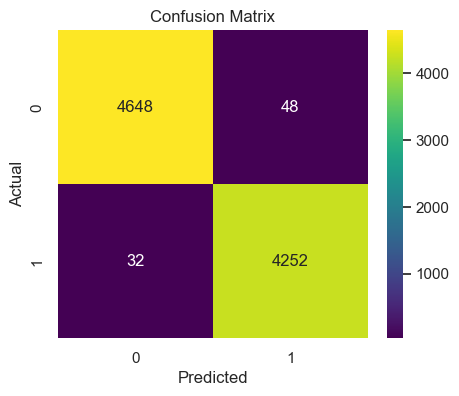

In [32]:
print('Classification Report:\n')
print(classification_report(y_test, y_pred))
print('\n')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the Pipeline

In [33]:
model_package = {
    'model_pipeline': best_model,
    'cleaner': clean
}

In [34]:
joblib.dump(model_package, 'FakeNews_detector.pkl')
print('Saved pipeline: FakeNews_detector.pkl')

Saved pipeline: FakeNews_detector.pkl


In [35]:
# Quick Prediction

In [36]:
def predict_news(text):
    cleaned = clean(text)
    pred = best_model.predict([cleaned])[0]
    prob = best_model.predict_proba([cleaned])[0][1]
    return pred, prob


In [40]:
sample = " FRANKFURT/WASHINGTON (Reuters) - A U.S. federal investigator probing alleged Russian interference in the 2016 U.S. presidential election asked Deutsche Bank (DBKGn.DE) for data on accounts held by President Donald Trump and his family, a person close to the matter said on Tuesday, but Trumpâ€™s lawyer denied any such subpoena had been issued. Germanyâ€™s largest bank received a subpoena from Special Counsel Robert Mueller several weeks ago to provide information on certain money and credit transactions, the person said, without giving details, adding that key documents had been handed over in the meantime. Deutsche Bank has lent the Trump Organization hundreds of millions of dollars for real estate ventures and is one of the few major lenders that has given large amounts of credit to Trump in the past decade. A string of bankruptcies at his hotel and casino businesses during the 1990s made most of Wall Street wary of extending him credit. Mueller is investigating alleged Russian attempts to influence the election, and potential collusion by Trump aides. Russia has denied U.S. intelligence agenciesâ€™ conclusion that it meddled in the election and Trump has said there was no collusion with Moscow. Jay Sekulow, one of Trumpâ€™s personal lawyers, said Deutsche Bank has not received any subpoena for financial records relating to the president as part of Muellerâ€™s probe. â€œWe have confirmed that the news reports that the Special Counsel had subpoenaed financial records relating to the president are false,â€ Sekulow told Reuters in a statement. â€œNo subpoena has been issued or received. We have confirmed this with the bank and other sources.â€ He later said the bank in question was Deutsche Bank. A spokesman for Mueller declined to comment. A Deutsche Bank spokesman in New York had no immediate comment beyond the statement the bank issued earlier on Tuesday which said the bank takes â€œits legal obligations seriously and remains committed to cooperating with authorized investigations into this matter.â€ A U.S. official with knowledge of Muellerâ€™s probe said one reason for the subpoenas was to find out whether Deutsche Bank may have sold some of Trumpâ€™s mortgage or other loans to Russian state development bank VEB or other Russian banks that now are under U.S. and European Union sanctions. VEB, as well as the Russian Agricultural Bank and Gazprombank GZPRI.MM did not immediately reply to emailed requests for comment. â€œNo one from the VTB Group (VTBR.MM) representatives has received a subpoena because there are absolutely no grounds for it,â€ a bank representative said in response to a request from Reuters. â€œDeutsche Bank did not contact us regarding people connected with the Trump administration.â€ â€œWe would not comment on the existence of any such request, had one been received,â€ responded a representative of Sberbank (SBER.MM). Holding Trump debt, particularly if some of it was or is coming due, could potentially give Russian banks some leverage over Trump, especially if they are state-owned, said a second U.S. official familiar with Russian intelligence methods. â€œOne obvious question is why Trump and those around him expressed interest in improving relations with Russia as a top foreign policy priority, and whether or not any personal considerations played any part in that,â€ the second official said, speaking on the condition of anonymity. A source close to Deutsche Bank said the bank had run checks on Trumpâ€™s financial dealings with Russia. During his election campaign, Trump said he would seek to improve ties with Russian President Vladimir Putin, which were strained during President Barack Obamaâ€™s administration. The subpoena was earlier reported by German daily Handelsblatt. During a photo opportunity with senators at the White House on Tuesday, Trump declined to answer shouted questions from reporters about whether Mueller had crossed a line by asking Deutsche Bank for information. In a July 9 interview with the New York Times, Trump said Mueller should not extend his investigation into Trumpâ€™s finances if they were not directly related to the Russia accusations. Asked if delving into his and his familyâ€™s finances unrelated to the Russia probe would cross a red line, Trump replied, â€œI would say yeah. I would say yes.â€ Deutsche Bank earlier this year rebuffed efforts by Democratic U.S. lawmakers to get more information on its dealings with Trump as well as any information it may have about whether the Republican, his family or advisers had financial backing from Russia. Trump had liabilities of at least $130 million to Deutsche Bank Trust Company Americas, a unit of the German bank, according to a federal financial disclosure form released in June by the U.S. Office of Government Ethics. The Deutsche debts include a loan exceeding $50 million for the Old Post Office, a historic property he redeveloped in downtown Washington, mortgages worth more than $55 million on a golf course in Florida, and a $25 million-plus loan on a Trump hotel and condominium in Chicago, the disclosure shows. All of those loans were taken out in 2012 and will mature in 2023 and 2024, according to the disclosure. Trump and Deutsche Bank have not always been on good terms. Trump sued the bank and other lenders in 2008, demanding $3 billion in damages, claiming they broke agreements in the construction and financing of a Chicago hotel. Deutsche Bank countersued and the two sides eventually settled. Internal Deutsche Bank documents seen by Reuters feature the names of Trumpâ€™s former campaign manager Paul Manafort and his wife, Kathleen, in a series of client profiles. But it was not immediately clear what their relationship with the bank is or had been. According to a person familiar with the matter who spoke on the condition of anonymity, Manafort and his wife do not have Deutsche Bank accounts. The bank declined to comment on whether Manafort is or has ever been a client. A spokesman for Manafort declined to comment. In October, Manafort pleaded not guilty to charges including conspiracy to launder money and conspiracy against the United States. The charges were brought as part of Muellerâ€™s investigation."
label, prob = predict_news(sample)
print(f"Sample Prediction: {'Real' if label == 1 else 'Fake'} (prob={prob:.3f})")

Sample Prediction: Real (prob=0.995)
